<a href="https://colab.research.google.com/github/Nischal957905/Ai_Face_Attendance/blob/main/FaceModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2, os, pickle
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Dropout,Conv2D

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stored_data_path = '/content/drive/MyDrive/FaceModel'
pictures_path = os.path.join(stored_data_path, 'data')
pictures_paths = '/content/drive/MyDrive/FaceModel/dataImage'

In [ ]:
def increase_image_span(pictures_path):
    datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.3,
        brightness_range=(0.9, 1.1),
        cval=255,
        rescale=1 / 255.0,
        rotation_range=30,
        width_shift_range=0.07,
        height_shift_range=0.07,
        horizontal_flip=True,
        fill_mode="reflect"
    )

    incrementerIndex = 0

    for person_folder in os.listdir(pictures_path):
        person_folder_path = os.path.join(pictures_path, person_folder)
        if os.path.isdir(person_folder_path):
            for l in os.listdir(person_folder_path):
                img_name = l.split("$")[0]
                keepImg = load_img(os.path.join(person_folder_path, l))
                formImg = img_to_array(keepImg)
                formImg = formImg.reshape((1, ) + formImg.shape)
                keepInc = 0


                for eachIteration in datagen.flow(formImg, batch_size=1, save_to_dir=pictures_paths, save_prefix=f'{person_folder}${keepInc}', save_format='jpeg'):
                    keepInc += 1
                    if keepInc > 200:
                        break

                incrementerIndex += 1
                print(f"{incrementerIndex} has been precessed")


In [ ]:
increase_image_span(pictures_path)

1 has been precessed
2 has been precessed
3 has been precessed
4 has been precessed
5 has been precessed
6 has been precessed
7 has been precessed
8 has been precessed
9 has been precessed
10 has been precessed
11 has been precessed
12 has been precessed
13 has been precessed
14 has been precessed
15 has been precessed
16 has been precessed
17 has been precessed
18 has been precessed
19 has been precessed
20 has been precessed
21 has been precessed
22 has been precessed
23 has been precessed
24 has been precessed
25 has been precessed
26 has been precessed


In [ ]:
def to_transfer_lab():

    for iterMap in os.listdir(pictures_paths):
      arr_extens = ('.jpg', '.jpeg', '.png')
      if iterMap.endswith(arr_extens):
        iterImg = cv2.imread(os.path.join(pictures_paths, iterMap))

        # Check if the image was read successfully
        if iterImg is not None:
            resized = cv2.resize(iterImg, (128, 128))
            each_iterImg.append(resized)
            if '$' in iterMap:
                new_labImg = iterMap.split("$")[0]
            else:
                new_labImg = iterMap.split(".")[0]
            each_iterLab.append(new_labImg)
        else:
            print(f"Failed to read image: {iterMap}")

each_iterImg = []
each_iterLab = []
to_transfer_lab()
each_iterImg = np.array(each_iterImg)
each_iterLab = np.array(each_iterLab)



In [ ]:
each_iterImg.shape

(5049, 128, 128, 3)

In [ ]:
each_iterLab

array(['Nischal', 'Nischal', 'Nischal', ..., 'STCS003', 'STCS003',
       'STCS003'], dtype='<U8')

In [ ]:
lablEncAbler = LabelEncoder()
each_iterLab = lablEncAbler.fit_transform(each_iterLab)
each_iterLab

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
tranmigateLab = lablEncAbler.inverse_transform(each_iterLab)
tranmigateLab

array(['Nischal', 'Nischal', 'Nischal', ..., 'STCS003', 'STCS003',
       'STCS003'], dtype='<U8')

In [ ]:
np.unique(tranmigateLab)

array(['Nischal', 'STCS001', 'STCS0010', 'STCS0011', 'STCS0012',
       'STCS0013', 'STCS0014', 'STCS002', 'STCS003', 'STCS004', 'STCS005',
       'STCS006', 'STCS007', 'STCS008', 'STCS009'], dtype='<U8')

In [ ]:
from sklearn.model_selection import train_test_split
intialTrain,initialTest,predecTrain,predecTest = train_test_split(each_iterImg,each_iterLab,test_size=0.2,random_state=40)

In [ ]:
initialTrain,initialTest = intialTrain/255.0,initialTest/255.0

In [ ]:
for l in [initialTrain,initialTest,predecTrain,predecTest]:
  print(l.shape)

(4039, 128, 128, 3)
(1010, 128, 128, 3)
(4039,)
(1010,)


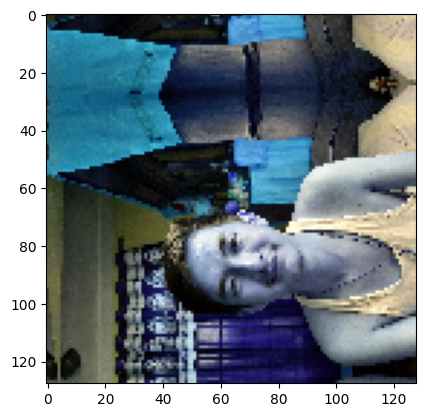

In [ ]:
plt.imshow(each_iterImg[100])

In [ ]:
initialTrain.shape,predecTrain.shape

((4039, 128, 128, 3), (4039,))

In [ ]:
num_classes = len(np.unique(each_iterLab))
num_classes

15

In [ ]:
predecTrain.shape

(4039,)

In [ ]:
def beginCreationModel():
  facialAttentionModel = Sequential()

  facialAttentionModel.add(Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=(128, 128, 3)))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.4))

  facialAttentionModel.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.4))

  facialAttentionModel.add(Conv2D(128, (4, 4), padding='same', activation='relu'))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.4))

  facialAttentionModel.add(Conv2D(256, (4, 4), padding='same', activation='relu'))  # New convolutional layer
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.4))

  facialAttentionModel.add(Flatten())

  facialAttentionModel.add(Dense(128, activation='relu'))
  facialAttentionModel.add(Dense(64, activation='relu'))
  facialAttentionModel.add(Dense(16, activation='relu'))
  facialAttentionModel.add(Dense(32, activation='softmax'))

  facialAttentionModel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return facialAttentionModel


In [ ]:
facialAttentionModel = beginCreationModel()

In [ ]:
facialAttentionModel.fit(initialTrain,predecTrain,validation_split=0.25,epochs=10)

Epoch 1/10
101/101 [==============================] - 8s 32ms/step - loss: 2.6692 - accuracy: 0.2491 - val_loss: 2.1406 - val_accuracy: 0.3824
Epoch 2/10
101/101 [==============================] - 2s 21ms/step - loss: 1.8082 - accuracy: 0.4222 - val_loss: 1.5885 - val_accuracy: 0.4307
Epoch 3/10
101/101 [==============================] - 2s 21ms/step - loss: 1.2681 - accuracy: 0.5723 - val_loss: 0.8520 - val_accuracy: 0.7017
Epoch 4/10
101/101 [==============================] - 2s 23ms/step - loss: 0.6512 - accuracy: 0.7768 - val_loss: 0.2549 - val_accuracy: 0.9468
Epoch 5/10
101/101 [==============================] - 2s 24ms/step - loss: 0.3616 - accuracy: 0.8790 - val_loss: 0.3499 - val_accuracy: 0.8849
Epoch 6/10
101/101 [==============================] - 2s 24ms/step - loss: 0.2507 - accuracy: 0.9211 - val_loss: 0.1093 - val_accuracy: 0.9777
Epoch 7/10
101/101 [==============================] - 2s 22ms/step - loss: 0.1620 - accuracy: 0.9468 - val_loss: 0.0759 - val_accuracy: 0.9790

In [ ]:
def extractPastLabel(titleLable,pretransformLabel,each_iterLab):

  for i in range(len(pretransformLabel)):
    titleLable[pretransformLabel[i]] = each_iterLab[i]

  return titleLable
titleLable = {}
extractPastLabel(titleLable,tranmigateLab,each_iterLab)
print(titleLable)

{'Nischal': 0, 'STCS0010': 2, 'STCS0011': 3, 'STCS008': 13, 'STCS007': 12, 'STCS0013': 5, 'STCS001': 1, 'STCS0012': 4, 'STCS0014': 6, 'STCS005': 10, 'STCS006': 11, 'STCS004': 9, 'STCS009': 14, 'STCS003': 8, 'STCS002': 7}


In [ ]:
p = initialTest[90].reshape(-1,128,128,3)

In [ ]:
prediction = facialAttentionModel.predict(p)

1/1 [==============================] - 0s 96ms/step


In [ ]:
predecTest[100]


10

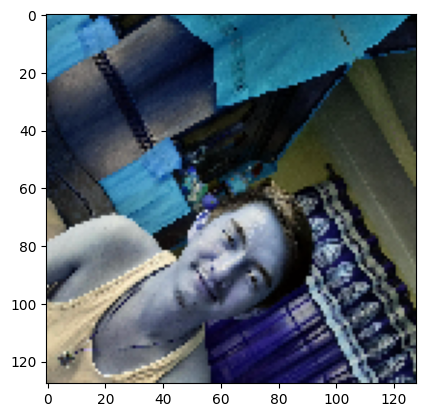

In [ ]:
plt.imshow(initialTest[90])

In [ ]:
np.argmax(prediction)

0

In [ ]:
# Load and preprocess the image
testerPath = '/content/drive/MyDrive/FaceModel/nl.jpg'
testingImg = cv2.imread(testerPath)
transformedProcessedImg = cv2.resize(testingImg, (128, 128))
processedImg = transformedProcessedImg / 255.0
processedImg  = np.expand_dims(processedImg , axis=0)

# Predict the label
findPrStudent = facialAttentionModel.predict(processedImg)
indexPredicted = np.argmax(findPrStudent)
labelPredicted = lablEncAbler.inverse_transform([indexPredicted])[0]

print(labelPredicted)

1/1 [==============================] - 0s 36ms/step
STCS0012


In [ ]:
facialAttentionModel.save('/content/drive/MyDrive/FaceModel/AiModelNischal.h5')

In [ ]:
encoder_path = '/content/drive/MyDrive/FaceModel/encoderNischal.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(lablEncAbler, file)